# Домашняя работа №1. "Введение и классификация рекомендательных систем"
## Постройте топ фильмов в категориях Action и Comedy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from tqdm import tqdm_notebook

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# Часть №1. Action.

In [7]:
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

In [8]:
joined_ratings.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Так как многие фильмы принадлежат к нескольким жанрам сразу, нам нужно, чтобы genres содержал Action, а не просто ему ровнялся.

In [9]:
joined_ratings_action = joined_ratings[joined_ratings.apply(lambda x: 'Action' in x['genres'], axis=1)]

In [10]:
joined_ratings_action.head(5)

,userId,movieId,rating,timestamp,title,genres
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
10,1,163,5.0,964983650,Desperado (1995),Action|Romance|Western


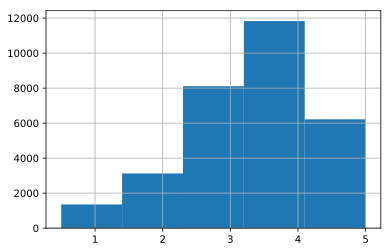

In [11]:
joined_ratings_action.rating.hist(bins=5)

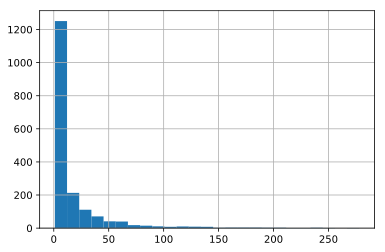

In [12]:
joined_ratings_action.groupby('title').rating.count().hist(bins=25)

In [13]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in tqdm_notebook(joined_ratings_action.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

HBox(children=(IntProgress(value=0, max=1827), HTML(value='')))

In [14]:
# достанем простые статистики по количеству рейтингов
min_num_ratings_action = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings_action = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings_action = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings_action = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [15]:
print(min_num_ratings_action)
print(max_num_ratings_action)
print(mean_num_ratings_action)
print(median_num_ratings_action)

1
278
16.7668308703
5.0


In [16]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in tqdm_notebook(joined_ratings_action.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

HBox(children=(IntProgress(value=0, max=1827), HTML(value='')))

In [17]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_ratings_action) / (max_num_ratings_action - min_num_ratings_action))
    )

In [18]:
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Matrix, The (1999)', 3.9538121525684975),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.5778276873123183),
 ('Braveheart (1995)', 3.205422673665224),
 ('Fight Club (1999)', 3.1041747597843043),
 ('Jurassic Park (1993)', 2.9950338781099397),
 ('Terminator 2: Judgment Day (1991)', 2.9708274874433775),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.9560183403919225),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.7832258451743699),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 2.6773392058535994),
 ('Saving Private Ryan (1998)', 2.5631049876453145),
 ('Lord of the Rings: The Return of the King, The (2003)', 2.5015840545779544),
 ('Independence Day (a.k.a. ID4) (1996)', 2.304076307579185),
 ('Gladiator (2000)', 2.1785858299500558),
 ('Batman (1989)', 2.1318184936118105),
 ('True Lies (1994)', 2.0356071833702032),
 ('Dark Knight, The (2008)', 2.023241496993645),
 ('Speed (1994)', 1.9650752120629666),
 ('Princess Bride, Th

## Посчитаем количество тегов для каждого фильма.
### (Не будем использовать join или merge, так как из-за этого количество тегов многократно дублируется и у нас получаются на некоторых фильмах более 10000 тегов, несмотря на то, что размер датафрейма tags около 3000, поэтому посчитаем теги для каждого фильма вручную)

In [19]:
tags_num = {}
Ids = list(set(tags['movieId'].unique()) & set(joined_ratings_action.movieId.unique()))

for Id in Ids:
    tags_num[list(movies[movies['movieId'] == Id]['title'])[0]] = tags[tags['movieId'] == Id].count()[0]

In [20]:
# достанем простые статистики по количеству тегов
min_num = np.min([tags_num[f] for f in tags_num.keys()])
max_num = np.max([tags_num[f] for f in tags_num.keys()])
mean_num = np.mean([tags_num[f] for f in tags_num.keys()])
median_num = np.median([tags_num[f] for f in tags_num.keys()])

In [21]:
print(min_num)
print(max_num)
print(mean_num)
print(median_num)

1
54
3.56170212766
1.0


### Видим, что максимальное количество тегов на фильме 54, что больше похоже на правду: макс. кол-во оценок 278, а тегов ожидаемо должно быть меньше, так как это еще одна доп. активность от пользователя.

In [22]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for Id, group in tqdm_notebook(ratings.groupby('movieId')):
    title = list(movies[movies['movieId'] == Id]['title'])[0]
    if title in tags_num.keys():
        title_mean_rating[title] = group.rating.mean()

HBox(children=(IntProgress(value=0, max=9724), HTML(value='')))

In [23]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for Id, group in tqdm_notebook(ratings.groupby('movieId')):
    title = list(movies[movies['movieId'] == Id]['title'])[0]
    if title in tags_num.keys():
        title_num_ratings[title] = group.userId.unique().shape[0]

HBox(children=(IntProgress(value=0, max=9724), HTML(value='')))

In [24]:
# достанем простые статистики по количеству рейтингов
min_num_ratings_action = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings_action = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings_action = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings_action = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

## Посчитаем метрику, как мы делали это на занятии.

In [25]:
film_with_mark = []

for f in tags_num.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_mark.append(
        (f, title_mean_rating[f] * (tags_num[f] - mean_num) / (max_num - min_num))
    )

In [26]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_mark, key=lambda x: x[1], reverse=True))[:20]

[('Fight Club (1999)', 4.0664076915427652),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  2.383851640341319),
 ('Star Wars: Episode IV - A New Hope (1977)', 1.7912856002725346),
 ('Inception (2010)', 1.7215820309758487),
 ('Avatar (2009)', 0.98155711075335128),
 ('Avengers: Infinity War - Part I (2018)', 0.86326776395022087),
 ('Suicide Squad (2016)', 0.84959186404389131),
 ('Blade Runner (1982)', 0.73027609070071609),
 ('Django Unchained (2012)', 0.6278829137005898),
 ('Terminator Salvation (2009)', 0.51744279405861104),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)',
  0.51210461928344886),
 ('Predator (1987)', 0.50271205849254041),
 ('Lord of the Rings: The Return of the King, The (2003)',
  0.50035522475506422),
 ('Braveheart (1995)', 0.48975349231918458),
 ('Battle Royale (Batoru rowaiaru) (2000)', 0.47781078549444667),
 ('Aliens (1986)', 0.40677295406319897),
 ('Star Trek (2009)', 0.39652443712619673),
 ('John Wick (2014)', 0.39451542795442912),

## Теперь попробуем немного модифицировать эту метрику. 

# $ X = \bar{\sigma}\cdot\frac{N_t - \bar{N_t}}{N_{t}^{max} - N_{t}^{min}}\cdot\frac{N_r - \bar{N_r}}{N_{r}^{max} - N_{r}^{min}}$,

## где X - наша метрика

## $\bar{\sigma}$ - средняя оценка. 

## $N_t$ - количество тегов, и $N_r$ - количество оценок

In [27]:
film_with_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in tags_num.keys():
    film_with_mark.append(
        (
            f, title_mean_rating[f] * (tags_num[f] - mean_num) / (max_num - min_num) *
        (title_num_ratings[f] - mean_num_ratings_action) / (max_num_ratings_action - min_num_ratings_action)
        )
    )

In [28]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_mark, key=lambda x: x[1], reverse=True))[:20]

[('Fight Club (1999)', 2.3751893885527156),
 ('Star Wars: Episode IV - A New Hope (1977)', 1.2596924636865476),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  0.66090130660173263),
 ('Inception (2010)', 0.53944402313256612),
 ('Braveheart (1995)', 0.31965829369636989),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)',
  0.28617911875987434),
 ('Lord of the Rings: The Return of the King, The (2003)',
  0.23264846128983072),
 ('Terminator 2: Judgment Day (1991)', 0.20143720389022265),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  0.182907269451383),
 ('Blade Runner (1982)', 0.17873505917572488),
 ('Avatar (2009)', 0.14456084216594789),
 ('Gladiator (2000)', 0.13548414958036567),
 ('Aliens (1986)', 0.10249466153382887),
 ('Matrix, The (1999)', 0.091099058982364617),
 ('Terminator, The (1984)', 0.08811749625006278),
 ('X-Men (2000)', 0.047182585861413585),
 ('Tekkonkinkreet (Tekkon kinkurîto) (2006)', 0.042129919804390

## Видно, что он немного поменялся.

## Теперь попробуем еще одну метрику, которая будет похожа, но будет учитывать веса слагаемых, например:

# $ X = \bar{\sigma} + 3\cdot\frac{N_t - \bar{N_t}}{N_{t}^{max} - N_{t}^{min}} + \frac{N_r - \bar{N_r}}{N_{r}^{max} - N_{r}^{min}}$

In [29]:
film_with_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in tags_num.keys():
    film_with_mark.append(
        (
            f, title_mean_rating[f] + 3 *  (tags_num[f] - mean_num) / (max_num - min_num) +
        (title_num_ratings[f] - mean_num_ratings_action) / (max_num_ratings_action - min_num_ratings_action)
        )
    )

In [30]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_mark, key=lambda x: x[1], reverse=True))[:20]

[('Fight Club (1999)', 7.7120339338932116),
 ('Star Wars: Episode IV - A New Hope (1977)', 6.2044017649177148),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  6.075564242668519),
 ('Inception (2010)', 5.6498679373892235),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 5.1389011686446455),
 ('Matrix, The (1999)', 5.0745657897767344),
 ('Braveheart (1995)', 5.0487697437228345),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  4.977842619712554),
 ('Lord of the Rings: The Return of the King, The (2003)', 4.9483174612525467),
 ('Blade Runner (1982)', 4.8797997082030538),
 ('Terminator 2: Judgment Day (1991)', 4.8279673618476746),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 4.6106384206158451),
 ('Gladiator (2000)', 4.6002746647327282),
 ('Dark Knight, The (2008)', 4.5980670354642736),
 ('Avatar (2009)', 4.5676319838321078),
 ('Aliens (1986)', 4.5240840931427408),
 ('Avengers: Infinity War - Part I (2018)', 4

## Первая тройка не поменялась, но далее некоторые изменения есть.

# Часть №2. Comedy. 
## Посмотрим аналогично как и с Action.

In [31]:
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

joined_ratings_comedy = joined_ratings[joined_ratings.apply(lambda x: 'Comedy' in x['genres'], axis=1)]

In [32]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in tqdm_notebook(joined_ratings_comedy.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

HBox(children=(IntProgress(value=0, max=3752), HTML(value='')))

In [33]:
# достанем простые статистики по количеству рейтингов
min_num_ratings_comedy = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings_comedy = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings_comedy = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings_comedy = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [34]:
print(min_num_ratings_comedy)
print(max_num_ratings_comedy)
print(mean_num_ratings_comedy)
print(median_num_ratings_comedy)

1
329
10.408315565
3.0


In [35]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in tqdm_notebook(joined_ratings_comedy.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

HBox(children=(IntProgress(value=0, max=3752), HTML(value='')))

In [36]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_ratings_action) / (max_num_ratings_action - min_num_ratings_action))
    )

In [37]:
movies[movies['title']=='Pulp Fiction (1994)']

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [38]:
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Forrest Gump (1994)', 4.1009312786012302),
 ('Pulp Fiction (1994)', 3.8000248947103876),
 ('Toy Story (1995)', 2.2477510329268315),
 ('Fargo (1996)', 1.8543756065826442),
 ('Aladdin (1992)', 1.7359343238150884),
 ('Back to the Future (1985)', 1.6734532839767702),
 ('Shrek (2001)', 1.5888872823881839),
 ('True Lies (1994)', 1.5377003014608728),
 ('Men in Black (a.k.a. MIB) (1997)', 1.3699146934433823),
 ('Princess Bride, The (1987)', 1.3109076766459422),
 ('Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
  1.2658155272289187),
 ('Groundhog Day (1993)', 1.2358385297013457),
 ('Finding Nemo (2003)', 1.2125463656772237),
 ('Monty Python and the Holy Grail (1975)', 1.1988848876980704),
 ('Mask, The (1994)', 1.1588648242182056),
 ('Ace Ventura: Pet Detective (1994)', 1.1502459138793326),
 ('Mrs. Doubtfire (1993)', 1.0741156088110539),
 ('Monsters, Inc. (2001)', 1.0592830525083388),
 ('Pretty Woman (1990)', 0.99139986287847126),
 ("Amelie (Fabuleux destin d'Amélie Poulain, 

In [39]:
tags_num = {}
Ids = list(set(tags['movieId'].unique()) & set(joined_ratings_comedy.movieId.unique()))

for Id in Ids:
    tags_num[list(movies[movies['movieId'] == Id]['title'])[0]] = tags[tags['movieId'] == Id].count()[0]

In [40]:
# достанем простые статистики по количеству тегов
min_num = np.min([tags_num[f] for f in tags_num.keys()])
max_num = np.max([tags_num[f] for f in tags_num.keys()])
mean_num = np.mean([tags_num[f] for f in tags_num.keys()])
median_num = np.median([tags_num[f] for f in tags_num.keys()])

In [41]:
print(min_num)
print(max_num)
print(mean_num)
print(median_num)

1
181
2.23062015504
1.0


In [42]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for Id, group in tqdm_notebook(ratings.groupby('movieId')):
    title = list(movies[movies['movieId'] == Id]['title'])[0]
    if title in tags_num.keys():
        title_mean_rating[title] = group.rating.mean()

HBox(children=(IntProgress(value=0, max=9724), HTML(value='')))

In [43]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for Id, group in tqdm_notebook(ratings.groupby('movieId')):
    title = list(movies[movies['movieId'] == Id]['title'])[0]
    if title in tags_num.keys():
        title_num_ratings[title] = group.userId.unique().shape[0]

HBox(children=(IntProgress(value=0, max=9724), HTML(value='')))

In [44]:
# достанем простые статистики по количеству рейтингов
min_num_ratings_comedy = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings_comedy = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings_comedy = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings_comedy = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [45]:
film_with_mark = []

for f in tags_num.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_mark.append(
        (f, title_mean_rating[f] * (tags_num[f] - mean_num) / (max_num - min_num))
    )

In [46]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_mark, key=lambda x: x[1], reverse=True))[:20]

[('Pulp Fiction (1994)', 4.168373976298092),
 ('Big Lebowski, The (1998)', 0.64905985406204791),
 ('Mary and Max (2009)', 0.25128552971576229),
 ('Punch-Drunk Love (2002)', 0.21665671573617307),
 ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
  0.18422240869495726),
 ('Burn After Reading (2008)', 0.16989111950352259),
 ('Forrest Gump (1994)', 0.15660335001007936),
 ('In Bruges (2008)', 0.1332898731119094),
 ('Life Is Beautiful (La Vita è bella) (1997)', 0.13294341183149322),
 ('South Park: Bigger, Longer and Uncut (1999)', 0.12378018892515527),
 ('Toy Story 2 (1999)', 0.12374758029427174),
 ('(500) Days of Summer (2009)', 0.11752440424921046),
 ('Friends with Benefits (2011)', 0.11470338070628767),
 ('Step Brothers (2008)', 0.11389946320905622),
 ('I Love You, Man (2009)', 0.11312509499924001),
 ('American Pie (1999)', 0.10829256666917537),
 ('Kiss Kiss Bang Bang (2005)', 0.10787882982650424),
 ('The Lego Movie (2014)', 0.10256730849379013),
 ('Superbad

In [47]:
film_with_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in tags_num.keys():
    film_with_mark.append(
        (
            f, title_mean_rating[f] * (tags_num[f] - mean_num) / (max_num - min_num) *
        (title_num_ratings[f] - mean_num_ratings_comedy) / (max_num_ratings_comedy - min_num_ratings_comedy)
        )
    )

In [48]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_mark, key=lambda x: x[1], reverse=True))[:20]

[('Pulp Fiction (1994)', 3.4894320366319835),
 ('Big Lebowski, The (1998)', 0.1455943784237666),
 ('Forrest Gump (1994)', 0.14159978529786155),
 ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
  0.036269113254659854),
 ('Fargo (1996)', 0.028685426709900722),
 ('Toy Story 2 (1999)', 0.024363024218811615),
 ('American Pie (1999)', 0.023301252602047642),
 ('Life Is Beautiful (La Vita è bella) (1997)', 0.022525632332977233),
 ('Clueless (1995)', 0.019041786181416789),
 ('Clerks (1994)', 0.017619739080920897),
 ('South Park: Bigger, Longer and Uncut (1999)', 0.016444492980609023),
 ('Monty Python and the Holy Grail (1975)', 0.012918426829455992),
 ('Incredibles, The (2004)', 0.010642649849212911),
 ('Addams Family Values (1993)', 0.010211654890850071),
 ('Toy Story (1995)', 0.0093288103315024035),
 ('Trainspotting (1996)', 0.0084222594429208628),
 ("There's Something About Mary (1998)", 0.0079958245563149823),
 ('Dogma (1999)', 0.0079645246300482121),
 ('Anch

In [49]:
film_with_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in tags_num.keys():
    film_with_mark.append(
        (
            f, title_mean_rating[f] + 5 * (tags_num[f] - mean_num) / (max_num - min_num) +
         3 * (title_num_ratings[f] - mean_num_ratings_comedy) / (max_num_ratings_comedy - min_num_ratings_comedy)
        )
    )

In [50]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_mark, key=lambda x: x[1], reverse=True))[:20]

[('Pulp Fiction (1994)', 11.674246535670731),
 ('Forrest Gump (1994)', 7.0647536047811048),
 ('Toy Story (1995)', 5.6122005052414874),
 ('Fargo (1996)', 5.551872317930318),
 ('Big Lebowski, The (1998)', 5.4244029106134999),
 ('Back to the Future (1985)', 5.2712873886439802),
 ('Princess Bride, The (1987)', 5.2282039342734841),
 ('Monty Python and the Holy Grail (1975)', 5.158251780733722),
 ('Aladdin (1992)', 5.1353815170744799),
 ('Shrek (2001)', 5.0917764100976619),
 ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
  5.0744876615582672),
 ('Finding Nemo (2003)', 4.9754339121920825),
 ("Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)", 4.950145611436735),
 ('Life Is Beautiful (La Vita è bella) (1997)', 4.8163010684458492),
 ('Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
  4.8105796704753114),
 ('True Lies (1994)', 4.7944910942174053),
 ('Incredibles, The (2004)', 4.7318773187538081),
 ('Trainspotting (1996)', 4.7247271513697804),
